In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('seattle-weather.csv')

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data_set = data.iloc[: ,2:3 ].values
data_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [6]:
data_set[0:10 , 0]

array([12.8, 10.6, 11.7, 12.2,  8.9,  4.4,  7.2, 10. ,  9.4,  6.1])

In [7]:
def data_to_Xy(data, timp_step= 10):
    x_set = []
    y_set = []

    for i in range(timp_step, len(data)):
        x_set.append(data[i-timp_step:i, 0])
        y_set.append(data[i, 0])

    x_set, y_set = np.array(x_set), np.array(y_set)
    return x_set, y_set

In [9]:
X, y = data_to_Xy(data_set)
print(len(X) , len(y))

1451 1451


In [10]:
X_train = X[:int(len(X)*0.8)] # 80 % train 80row
y_train = y[:int(len(y)*0.8)] #80 row

X_test = X[int(len(X)*0.8):] # 20% #81 ->100
y_test = y[int(len(y)*0.8):]

In [11]:
X_train.shape

(1160, 10)

In [12]:
# Reshaping (n of  samples , time_step , dim)
X_train = np.reshape(X_train , (X_train.shape[0] ,X_train.shape[1]  , 1))
X_test = np.reshape(X_test , (X_test.shape[0] ,X_test.shape[1]  , 1))

In [13]:

model = Sequential()

model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(units=1 , ))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Compiling
model.compile(optimizer='adam' , loss = 'mean_squared_error')

In [15]:
# Model Training
history = model.fit(X_train , y_train , batch_size=128 , epochs=10 , validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 232.2113 - val_loss: 169.9144
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 158.8920 - val_loss: 134.9721
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 128.1923 - val_loss: 114.4972
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 109.9536 - val_loss: 100.0310
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 97.0081 - val_loss: 89.9009
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 88.5050 - val_loss: 82.8965
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 81.9141 - val_loss: 78.1673
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 77.1117 - val_loss: 74.2401
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 72.8984 - val_loss: 70.7483
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 69.8708 - val_loss: 67.6011


In [16]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

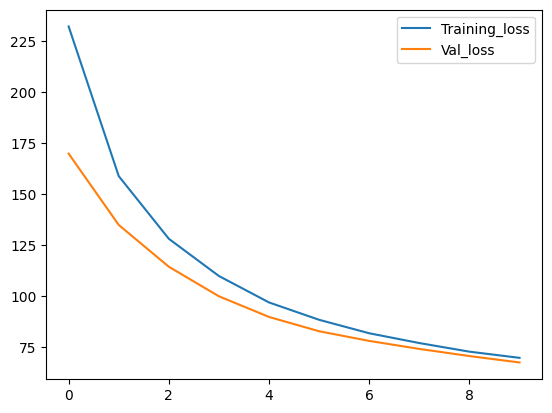

In [19]:
# Plot Loss vs Val_loss

plt.plot(history.history['loss'] , label = "Training_loss")
plt.plot(history.history['val_loss'] , label = "Val_loss")
plt.legend()
plt.show()

In [20]:
# Predict using test data
pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step
